# Ford GoBike System Data Exploration

This document explores a dataset includes information about 183,412 individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

Each trip is anonymized and includes:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Bike Share for All Trip (its an annual membership where members pay a fixed amount for their first 60 minutes of each trip)


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
bike_trips = pd.read_csv('tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(bike_trips.shape)
print(bike_trips.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [4]:
bike_trips.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
bike_trips.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
by_name = bike_trips.groupby(['start_station_name','start_station_latitude']).count().reset_index()
by_long = bike_trips.groupby(['start_station_latitude', 'start_station_name']).count().reset_index()


In [7]:
# showing the missimg data table
bike_trips[~bike_trips['start_station_latitude'].isin(by_long['start_station_latitude'])]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


**Here, we can see there are 197 recods that don't have any information about the station start and end name, and the (longitude,latitude) data are wrong, therefore, these records need to be removed**

In [8]:
bike_trips['start_station_name'].nunique()


329

In [9]:
bike_trips[['start_station_latitude','start_station_name']].nunique()

start_station_latitude    334
start_station_name        329
dtype: int64

In [10]:
bike_trips['start_station_longitude'].nunique()

335

After Assessing the dataset visually and programmatically, some points need to be addressed before continuing our analysis:
- some columns need to have a proper data type:
  - `start_station_id` should be of type `int`
  - `end_station_id` should be of type `int`
  - `start_time` should be of type `datetime`
  - `end_time` should be of type `datetime`<br>
  <br>
- There are 197 recods that don't have any information about the station start and end name that need to be removed

In [11]:
# dropping the null station names
bike_trips = bike_trips[bike_trips['start_station_name'].notna()]

In [12]:
# changing types
bike_trips['start_station_id'] = bike_trips['start_station_id'].astype(np.int64)
bike_trips['end_station_id'] = bike_trips['end_station_id'].astype(np.int64)
bike_trips['start_time'] = pd.to_datetime(bike_trips['start_time']) 
bike_trips['end_time'] = pd.to_datetime(bike_trips['end_time']) 

In [13]:
bike_trips.shape

(183215, 16)

In [14]:
bike_trips.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### What is the structure of your dataset?
There are 183215 bike rides recorded in the dataset with (duration_sec, start_time, end_time, station start information, stations end information, user type, user gender, bike share for all program), variables are varying between categorical and numeric.

### What is/are the main feature(s) of interest in your dataset?
I'm most intrested in figuring out what features are best for predicting the most trips taken in terms of the day of the week, and what features are best for predicting the average trip duration for each ride.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that the station location will have a strong effect on the number of trips taken in terms of the day of the week, and the user type(wherther if the user is a member or a casual rider) will have a high effect on the average trip duration.
  

## Univariate Exploration
I'll start by looking at the distribution of the main variables of interest: start_time, and duration_sec.

**start_time**

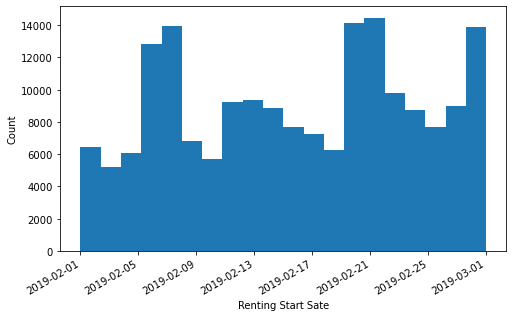

In [15]:
# start with a standard-scaled plot for the start_time
binsize = 20

fig, ax = plt.subplots(figsize=[8, 5])
ax.hist(data = bike_trips, x = 'start_time', bins = binsize)
ax.set_xlabel('Renting Start Sate')
ax.set_ylabel('Count')
fig.autofmt_xdate()
plt.show()

we can see on this chart that the data was recorded between the 1st of February and the 1st of March. It is also showing increasing trends in bike renting rates on some days, but is hard to distinguish these days with this chart, with that, we will extract the weekdays data from the date column and add it to the dataset as an ordinal categorical variable for our analysis. 

In [16]:
# creating day_of_week column
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
              categories = ['Sunday',  'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

                                         
bike_trips['day_of_week'] = bike_trips['start_time'].dt.day_name().astype(ordered_var)

In [17]:
bike_trips['day_of_week'].unique()

['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday']
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

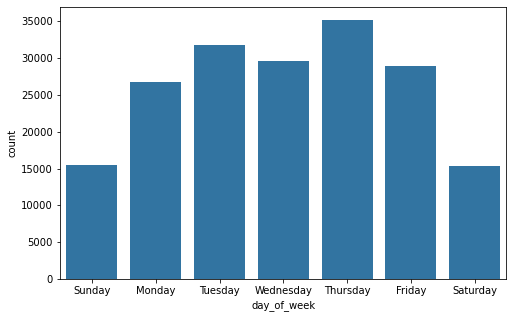

In [18]:
# plot the day_of_week variable

fig, ax = plt.subplots(figsize=[8, 5])

default_color = sb.color_palette()[0]
sb.countplot(data = bike_trips, x = 'day_of_week', color = default_color)

plt.show()

We can see from this chart that the high trend of bike renting is recorded mostly on Thursdays and Tuesdays, we will investigate the weekdays further against other variables.

**duration_sec**

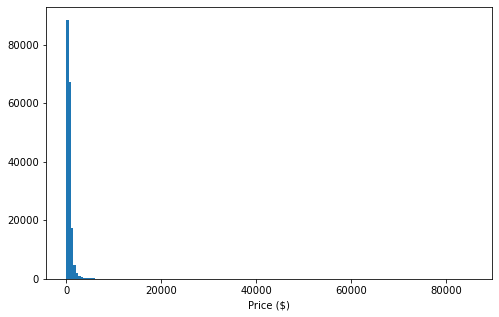

In [19]:
# exploring the other main variable: rent durations

binsize = 500
bins = np.arange(0, bike_trips['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_trips, x = 'duration_sec', bins = bins)
plt.xlabel('Price ($)')
plt.show()

This chart is showing most of the renting durations has a short duration values, but some records are showing high duration values. we could convert the scale to a log scale to capture the values shape on the chart, but before we do that, first will convert the durations unit into minutes, as the derations in minutes can be more representative to our analysis.

In [20]:
bike_trips['duration_min'] = bike_trips['duration_sec'].apply(lambda x : x / 60)

In [21]:
bike_trips['duration_min'].describe()

count    183215.000000
mean         12.098367
std          29.917978
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

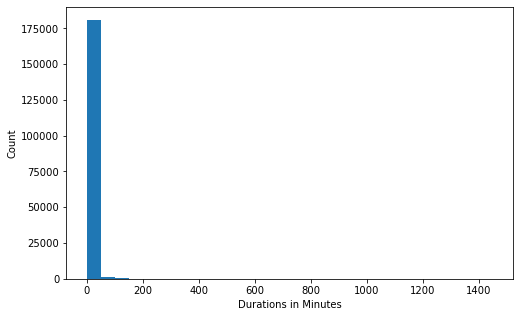

In [22]:
# plot the duration in minutes

binsize = 50
bins = np.arange(0, bike_trips['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_trips, x = 'duration_min', bins = bins)
plt.xlabel('Durations in Minutes')
plt.ylabel('Count')
plt.show()

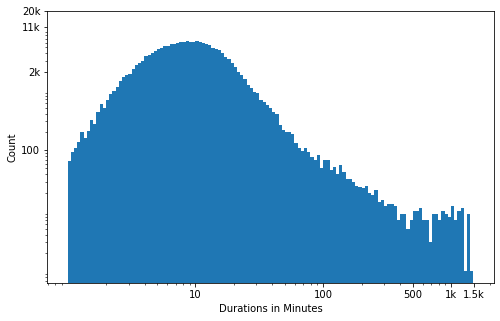

In [23]:
# there's a long tail in the distribution, so let's put it on a log scale instead

log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(bike_trips['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_trips, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.yscale('log')
plt.xticks([10, 100, 500, 1000, 1500], [10, 100, 500, '1k', '1.5k'])
plt.yticks([100, 2e3, 11e3, 2e4 ], [ 100, '2k', '11k', '20k'])
plt.xlabel('Durations in Minutes')
plt.ylabel('Count')

plt.show()


When plotting durations on a log scale, the distribution looks unimodal that is skewed to the right with a peak around 10 min duration rides.

#### Will explore the predictor variables next

**stations_names**

In [24]:
bike_trips['start_station_name'].value_counts().nlargest(10)

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Howard St at Beale St                                        2293
Steuart St at Market St                                      2283
Name: start_station_name, dtype: int64

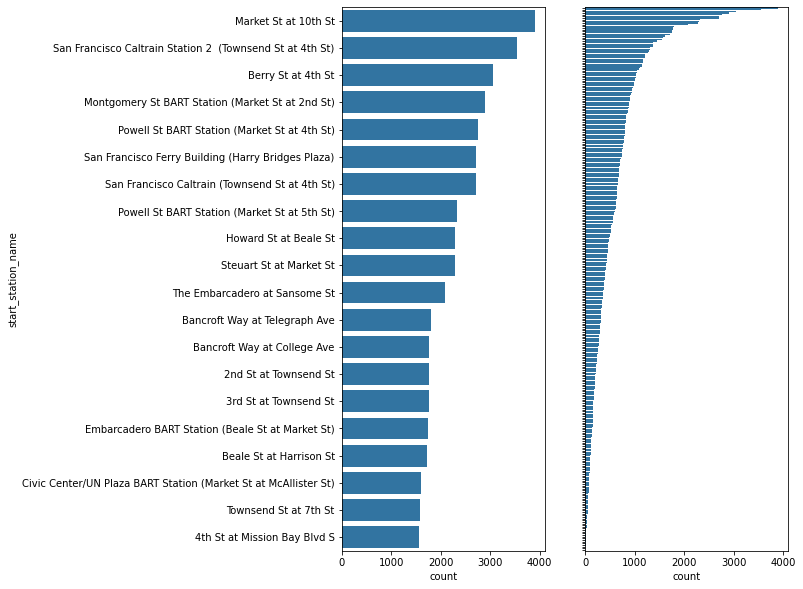

In [25]:
# plot the day_of_week variable

stations_order_10 = bike_trips['start_station_name'].value_counts().nlargest(20).index
stations_order = bike_trips['start_station_name'].value_counts().index

fig, ax = plt.subplots(ncols=2,figsize=[8, 10])

default_color = sb.color_palette()[0]
sb.countplot(data=bike_trips,  y = 'start_station_name', color = default_color,order=stations_order_10 ,ax=ax[0])
ax2 = sb.countplot(data=bike_trips,  y = 'start_station_name', color = default_color, order=stations_order,ax=ax[1])
ax2.set_yticklabels([])
ax2.set_ylabel('')
plt.show()

The above chart are showing the distributions of the stations on the bike rides. The left chart showing the hole distribution across all branches, and it is showing that some stations are renting bikes more than other stations that have very low counts. while the right chart is showing the top 20 stations that have the higher renting rates. We will explor the stations more against other variables.

**user_type**

In [26]:
def bar_with_percentage(bike_data, variable):
  fig, ax = plt.subplots(figsize=[8, 5])

  default_color = sb.color_palette()[0]
  sb.countplot(data = bike_data, x = variable, color = default_color)

  # Recalculating the type_counts just to have clarity.
  type_counts = bike_data[variable].value_counts()

  # get the current tick locations and labels
  locs, labels = plt.xticks() 

  # loop through each pair of locations and labels
  for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/bike_data.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')



  plt.show()

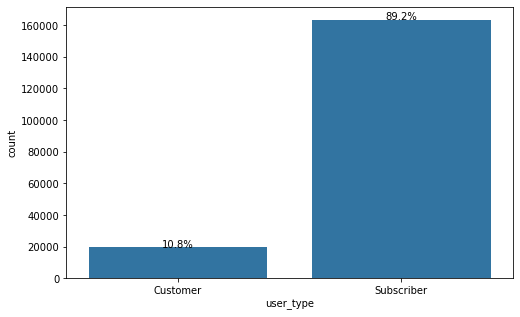

In [27]:
# plot the user_type variable
bar_with_percentage(bike_trips, 'user_type')



Looking at the distributions of the user_types, we can see there are high number of Subscribers (around 89%) in the dataset, while around 11% are casual customers.  

**bike_id**

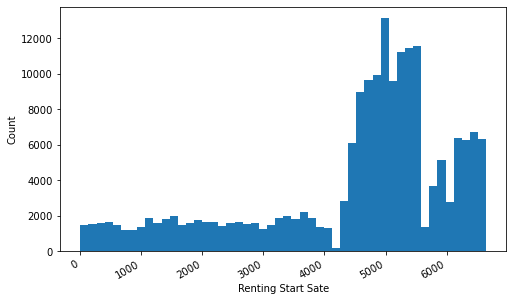

In [28]:
# start with a standard-scaled plot for the start_time
binsize = 50

fig, ax = plt.subplots(figsize=[8, 5])
ax.hist(data = bike_trips, x = 'bike_id', bins = binsize)
ax.set_xlabel('Renting Start Sate')
ax.set_ylabel('Count')
fig.autofmt_xdate()
plt.show()

Interestingly, the above chart is showing that some bikes has higher amount of renting, probably beacuase they belog to stations with higher rents values. we can correlate them with the stations names later.

**bike_share_for_all_trip**

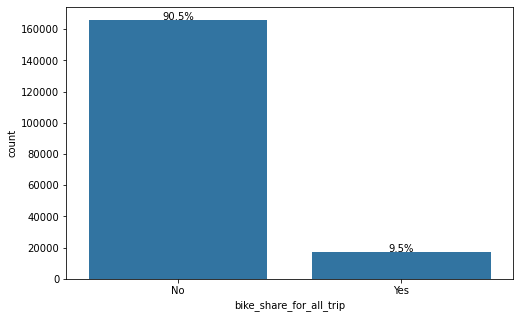

In [29]:
# plot the bike_share_for_all_trip variable

bar_with_percentage(bike_trips, 'bike_share_for_all_trip')

This chart showing that bike_share_for_all program is not contributing much to the amout of bike rents, therefore, will not investigate on this variable any longer.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The duration variable was taking a large range of vlues, so I looked at the data using a log transform. Under the transformation, the data looked unimodal that is skewed to the right with a peak around 10 min duration rides.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
When invetigating the renting dates, I saw there are high peaks on some dates that wasn't very clear on the date distributions, so created another feature called week_days, that extracts the days from the dates and see the distribution on each day.



In [30]:
bike_trips.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'day_of_week', 'duration_min'],
      dtype='object')

## Bivariate Exploration

In [31]:
numeric_vars = ['duration_min', 'bike_id', 'start_station_latitude', 'start_station_longitude']
categoric_vars = ['day_of_week', 'user_type', 'start_station_name']

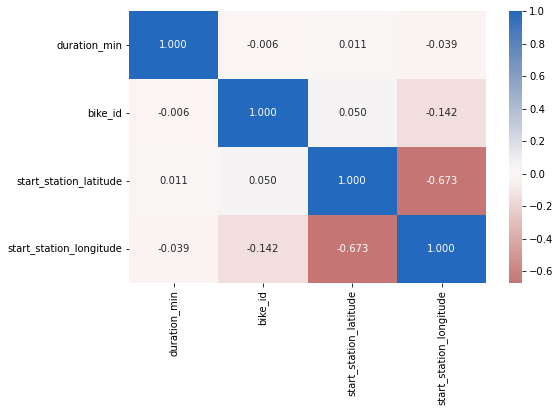

In [32]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_trips[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

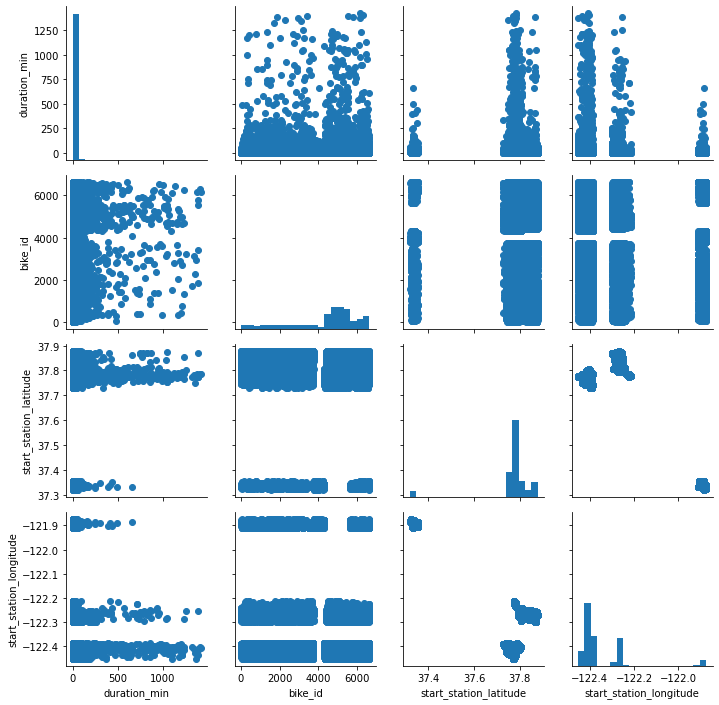

In [33]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
# samples = np.random.choice(bike_trips.shape[0], 500, replace = False)
# trip_samp = bike_trips.loc[samples,:]

g = sb.PairGrid(data = bike_trips, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Since most of the variables in the dataset are categorical in nature, it is expected that there is no strong correlation between the numeric variables in the dataset.

Lets move on to looking how durations can correlate with the categorical variables.

In [34]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

bike_trips['log_durations'] = bike_trips['duration_min'].apply(log_trans)

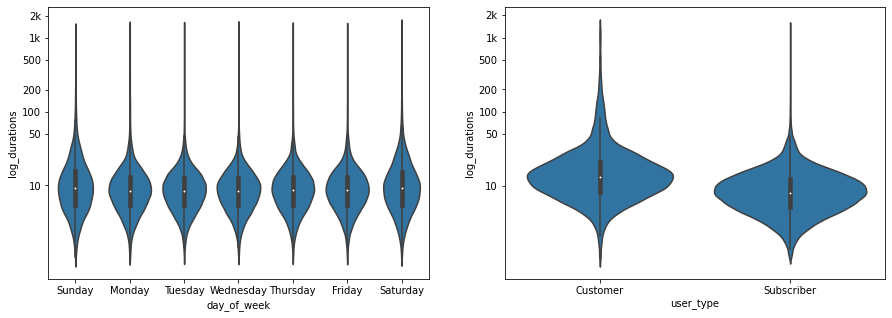

In [35]:
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [15,5])

sb.violinplot(data = bike_trips, x = 'day_of_week', y = 'log_durations', ax = ax[0],
            color = default_color)
ax[0].set_yticks(log_trans(np.array([10, 50, 1e2, 2e2, 5e2, 1e3, 2e3])))
ax[1].set_yticks(log_trans(np.array([10, 50, 1e2, 2e2, 5e2, 1e3, 2e3])))

sb.violinplot(data = bike_trips, x = 'user_type', y = 'log_durations', ax = ax[1],
            color = default_color)
ax[0].set_yticklabels([10, 50, '100', '200', '500', '1k', '2k'])
ax[1].set_yticklabels([10, 50, '100', '200', '500', '1k', '2k'])

plt.show()

It is clearly showing that the average of 10 minutes rides are distributed close to equally along other variables, also the higher durations are also has similar distributions. with that, I will use the average duration values to compare the variables.

**durations_min vs user_type**

In [36]:
def bar_plot_avg_durations(x):
  fig, ax = plt.subplots(figsize=[8, 5])
  base_color = sb.color_palette()[0]
  sb.barplot(data=bike_trips, x=x, y='duration_min', color=base_color, errwidth=0)
  # plt.xticks(rotation=15)
  plt.ylabel('Avg. Durations (min)');

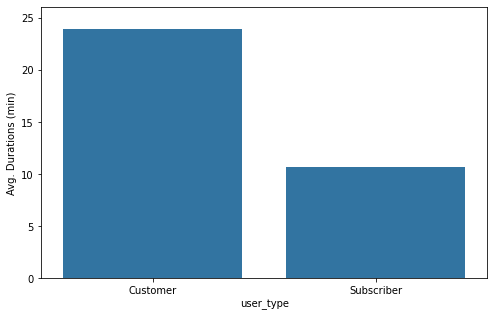

In [37]:
bar_plot_avg_durations('user_type')

Interestingly, unlike what I've expected, the higher duration rides were coming from the casual customers, and most of the 10 minutes rides were made by the Subscribers.

Will move on to looking how day_of_week can correlate with other variables.

**day_of_week vs durations_min**

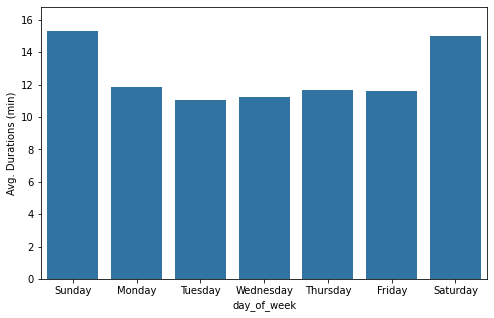

In [38]:
bar_plot_avg_durations('day_of_week')

Since the high renting durations were coming from the casual customers, it was expected that these durations were also took place on the weekends.

**day_of_week vs user_type**

In [39]:
def bar_weekday_usertype(bike_data, variable, hue):
  fig, ax = plt.subplots(figsize=[8, 5])

  default_color = sb.color_palette()[0]
  sb.countplot(data = bike_data, x = variable, hue=hue)

  # Recalculating the type_counts just to have clarity.
  type_counts = bike_data[[variable,hue]].value_counts()

  # get the current tick locations and labels
  locs, labels = plt.xticks() 

  # loop through each pair of locations and labels
  for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count_sub = type_counts[label.get_text()]['Subscriber']
    count_cus = type_counts[label.get_text()]['Customer']
    # print(count)
    pct_string1 = '{:0.1f}%'.format(100*count_sub/(bike_data.shape[0]))
    pct_string2 = '{:0.1f}%'.format(100*count_cus/(bike_data.shape[0]))

    # print the annotation just below the top of the bar
    plt.text(loc, count_sub-2, pct_string1, color = 'black')
    plt.text(loc, count_cus, pct_string2, ha = 'right', color = 'black')



  plt.show()

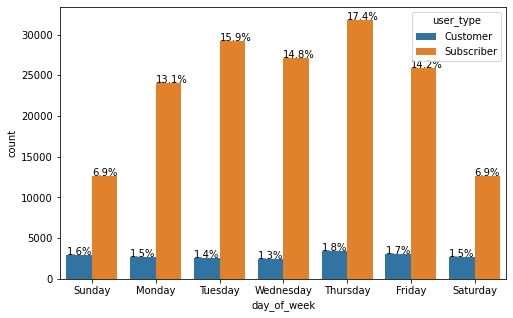

In [40]:
bar_weekday_usertype(bike_trips, 'day_of_week', 'user_type' )

As expected, our subscribers were making the highest bike rents, and most of these rents were made during the workdays.

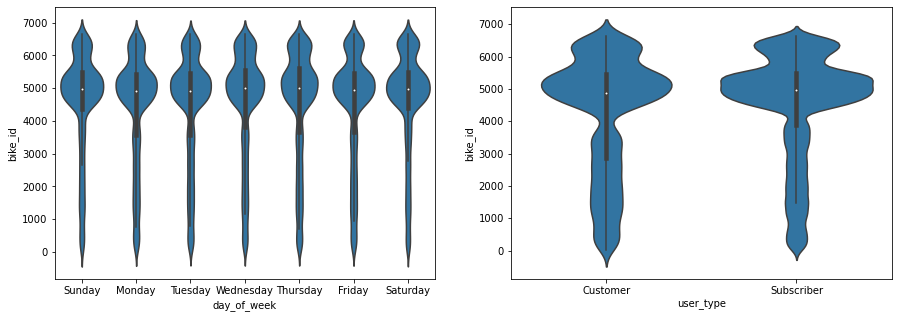

In [41]:
# plotting other features 
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [15,5])

sb.violinplot(data = bike_trips, x = 'day_of_week', y = 'bike_id', ax = ax[0],
            color = default_color)

sb.violinplot(data = bike_trips, x = 'user_type', y = 'bike_id', ax = ax[1],
            color = default_color)
plt.show()

By plotting the bikes ids and compare it with the week days and customer types, looks like there are specific bikes ids (that have more than 4000) that had a high number of rents, probably they're belong to a station or area that has the most rents happening. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
By comparing the average durations with the customer types, it turn out that the casual customers that were making the high duration rents that was showing on the duration distributions, and most of these durations were made during the weekends, but the amount of bike rents was higher during the workdays, most of them were made by the subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Bike ids feature has an interesting relationship between the rents distributions along the week days, from the plot it showed that some ids have a high amount of rents indicating that they might belong to an area or a station that is making the high bike rents.


## Multivariate Exploration

**day_of_week vs user_type vs duration_min**

<AxesSubplot:xlabel='day_of_week', ylabel='user_type'>

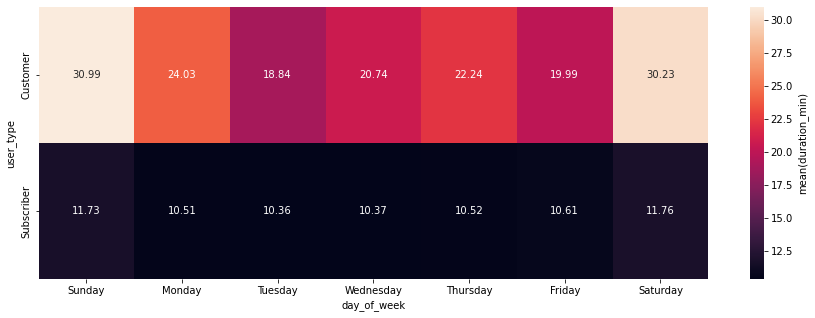

In [42]:
cat_means = bike_trips.groupby(['day_of_week', 'user_type']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'day_of_week',
                            values = 'duration_min_avg')
cat_means
fig, ax = plt.subplots(figsize = [15,5])

sb.heatmap(cat_means, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'mean(duration_min)'})

Interestingly, the casual customers are taking the highest durations (up to 30 minutes on average), even in the workdays as this chart indicates, and all the subscribers are dominating the lower duration rates.

**latitude vs longitude vs bike_id**

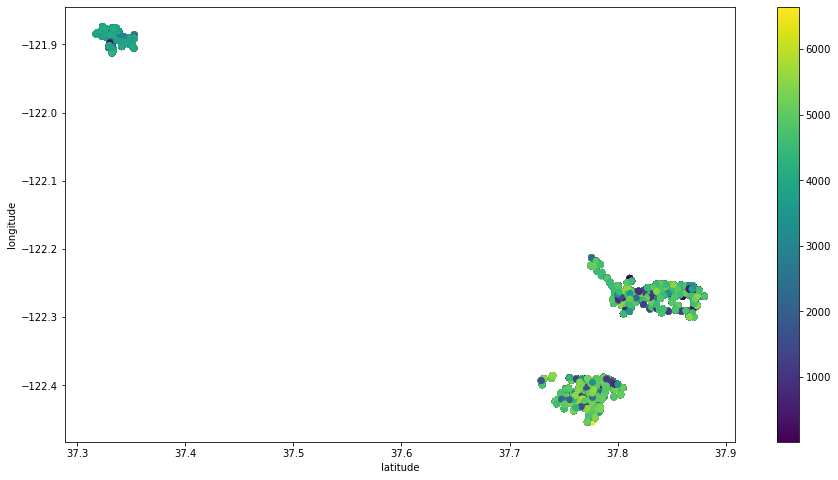

In [43]:
fig, ax = plt.subplots(figsize = [15,8])

plt.scatter(data = bike_trips, x = 'start_station_latitude', y = 'start_station_longitude', c = 'bike_id')
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('longitude');

Unlike what I've expected on the bike Ids that are higher than 4000 could belong to a specific location, by plotting the station locations and mark the bike ids, it is showing that the bikes that has ids more than 4000 are distributed equally thought the stations.

**latitude vs longitude vs duration_min**

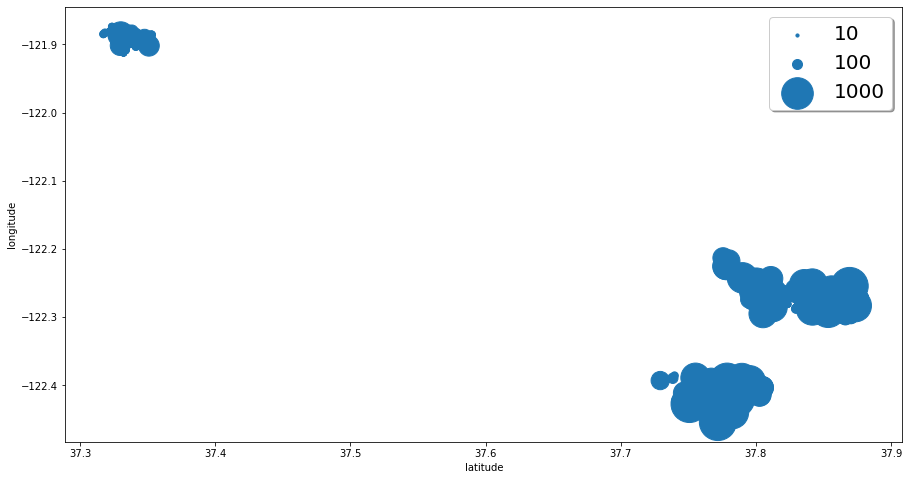

In [44]:
fig, ax = plt.subplots(figsize = [15,8])

plt.scatter(data = bike_trips, x = 'start_station_latitude', y = 'start_station_longitude', s = 'duration_min')

# dummy series for adding legend
sizes = [10, 100, 1000]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, prop={'size': 20},shadow=True)
plt.xlabel('latitude')
plt.ylabel('longitude');

This final chart is showing the trips durations by the stations locations, it is indicating that the higher durations trips were made in a specific area, probably thses stations were most of the casual costomers head to.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
By adding the days activity and the user types to the average trips durations, the data was showing that the casual customers are taking the highest durations (up to 30 minutes on average), even in the workdays, and all the subscribers are dominating the lower duration rates.

### Were there any interesting or surprising interactions between features?
Plotting the stations locations (latitude and longitude) by deferent features gave us other insights about how the trips are distributed, trips durations showed an increase in specific area defined on the chart, were the bukes IDs showed that the ids that were showing high durations were equally distributed and they're not related to station or area.